In [204]:
from helper import *

In [320]:
from jpeg2dct.numpy import load, loads


#read from a file
jpeg_file = '../JMiPOD/00133.jpg'
dct_y, dct_cb, dct_cr = load(jpeg_file)
print ("Y component DCT shape {} and type {}".format(dct_y.shape, dct_y.dtype))
print ("Cb component DCT shape {} and type {}".format(dct_cb.shape, dct_cb.dtype))
print ("Cr component DCT shape {} and type {}".format(dct_cr.shape, dct_cr.dtype))

#read from a file
jpeg_file = '../Cover/00133.jpg'
dct_y_cov, dct_cb, dct_cr = load(jpeg_file)
print ("Y component DCT shape {} and type {}".format(dct_y_cov.shape, dct_y_cov.dtype))
print ("Cb component DCT shape {} and type {}".format(dct_cb.shape, dct_cb.dtype))
print ("Cr component DCT shape {} and type {}".format(dct_cr.shape, dct_cr.dtype))

Y component DCT shape (64, 64, 64) and type int16
Cb component DCT shape (32, 32, 64) and type int16
Cr component DCT shape (32, 32, 64) and type int16
Y component DCT shape (64, 64, 64) and type int16
Cb component DCT shape (32, 32, 64) and type int16
Cr component DCT shape (32, 32, 64) and type int16


In [321]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [322]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

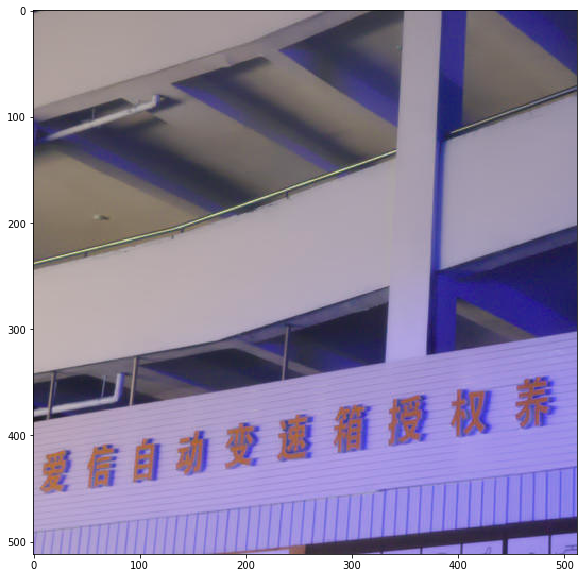

In [323]:
plt.imshow(cv2.imread(jpeg_file))

In [324]:
dct_img = np.zeros((512, 512))
for i in range(dct_y.shape[0]):
    for j in range(dct_y.shape[1]):
        dct_img[i*8:(i+1)*8, j*8:(j+1)*8] += dct_y[i][j].reshape(8, 8)
        
        
dct_img_cov = np.zeros((512, 512))
for i in range(dct_y_cov.shape[0]):
    for j in range(dct_y_cov.shape[1]):
        dct_img_cov[i*8:(i+1)*8, j*8:(j+1)*8] += dct_y_cov[i][j].reshape(8, 8)

In [325]:
dct_img.shape

(512, 512)

In [326]:
x = dct_img - dct_img_cov + 13

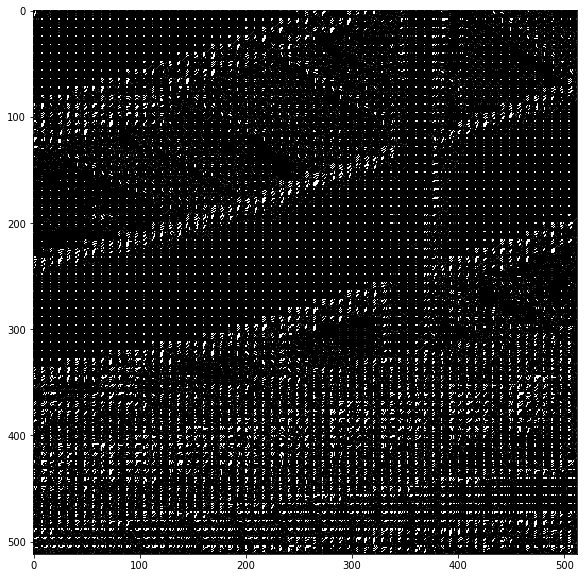

In [327]:
plt.imshow(dct_img_cov,cmap='gray',vmax = np.max(dct_img)*0.01,vmin = 0)

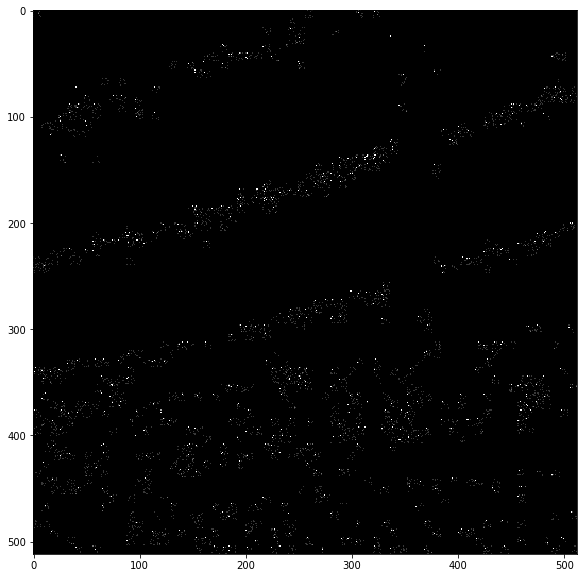

In [328]:
plt.imshow(dct_img - dct_img_cov,cmap='gray',vmax = np.max(dct_img)*0.01,vmin = 0)

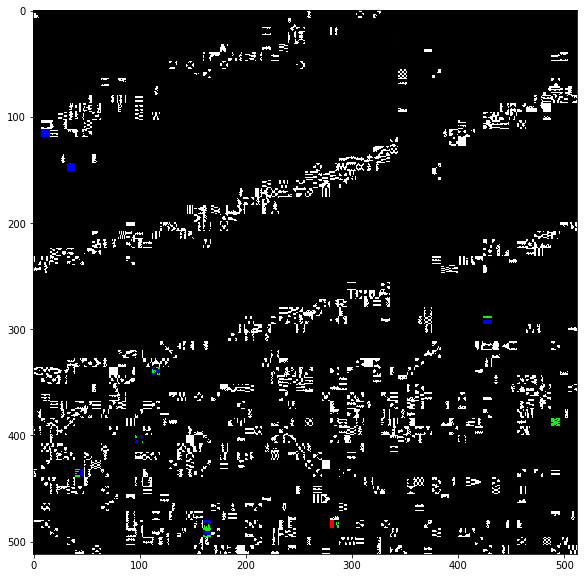

In [330]:
img_u = cv2.imread('../JMiPOD/00133.jpg')
img_c = cv2.imread('../Cover/00133.jpg')

plt.imshow(img_u - img_c, cmap='gray')

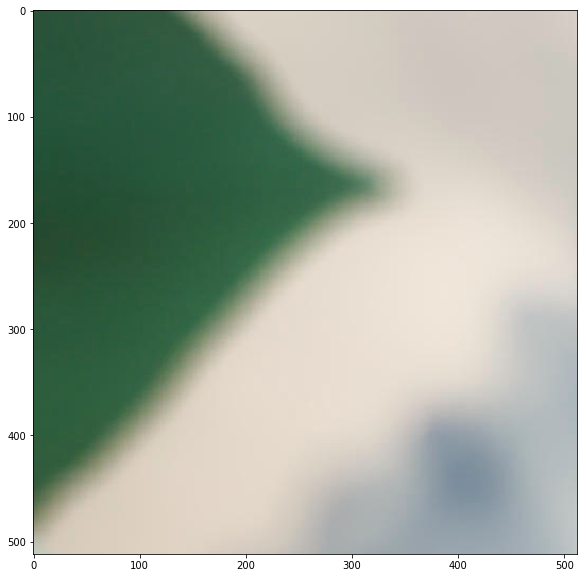

In [306]:
plt.imshow(img_c)

In [307]:
T = 3
jump = 2

dct_img = dct_img.astype(int)
transition_matrix(SPAM_Dd(dct_img, jump, jump, T)+T, T)

/home/usman/workspace/Alaska2ImageSteganalysis/model/helper.py:57: RuntimeWarning: invalid value encountered in true_divide
  M = M/M.sum(axis=1)[:,None]


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.20481928e-02, 9.69879518e-01,
        1.80722892e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.14012085e-03, 2.73629005e-02, 9.45274199e-01,
        2.56527192e-02, 5.70060426e-04, 0.00000000e+00],
       [4.42889411e-06, 2.13472696e-03, 3.67243899e-02, 9.22330484e-01,
        3.67332477e-02, 2.07272244e-03, 0.00000000e+00],
       [0.00000000e+00, 6.85871056e-04, 2.57201646e-02, 9.49474166e-01,
        2.34339278e-02, 6.85871056e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.66666667e-02, 9.50000000e-01,
        3.12500000e-02, 2.08333333e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

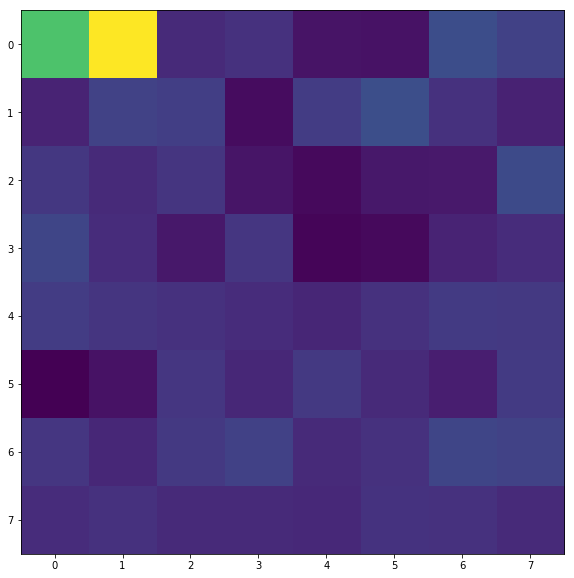

In [78]:
plt.imshow(dct_y[0][2].reshape(8, 8))

In [81]:
dct_y[0][2].reshape(8, 8)

array([[216, 321,  -9,   0, -34, -36,  35,  18],
       [-17,  20,  16, -42,  12,  36,   0, -18],
       [  7,  -9,   4, -33, -44, -30, -28,  30],
       [ 25,  -6, -30,   6, -49, -45, -16,  -6],
       [ 13,   4,   0,  -6, -14,   0,  10,   8],
       [-54, -36,   6, -12,   8, -10, -22,  10],
       [  5, -12,   8,  18, -10,   0,  24,  20],
       [ -7,   0, -10, -10, -11,   1,   0, -10]], dtype=int16)

In [90]:
def SPAM(img, i_prime=0, j_prime=3, T=3):
    T+=1
    diff_img = []
    for i in range(0, img.shape[0], 1):
        for j in range(0, img.shape[1], 1):
            if j+j_prime<img.shape[1] and i+i_prime<img.shape[0]:
                diff = int(img[i][j]) - int(img[i+i_prime][j+j_prime])
                if abs(diff) < T:
                    diff_img.append(diff)
    return np.array(diff_img)

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return np.array(M)

In [165]:
x = np.array([[1,2,3,4],
              [8,9,11,12],
              [3,5,7,9]  
])

print(SPAM(x, 0, 2, 3))

diff = (x[:,:x.shape[1]-2] - x[:, 2:]).ravel()

print(diff)

diff[np.logical_and(diff>=-3, diff<=3)]

# x[0]

[-2 -2 -3 -3]
[-2 -2 -3 -3 -4 -4]


array([-2, -2, -3, -3])

In [124]:
for i in range(dct_y.shape[0]):
    for j in range(dct_y.shape[1]):
        Dh = SPAM(dct_y[i][j].reshape(8, 8), i_prime=3, j_prime=0)
        try:
            h = np.append(Dh, h)
        except:
            h = Dh
            
h = h.astype(int)

In [125]:
h

array([3, 3, 0, ..., 0, 0, 3])

In [126]:
transition_matrix(h + 3)

array([[0.05611802, 0.08388776, 0.10413653, 0.51084756, 0.10934336,
        0.0853341 , 0.05033266],
       [0.06123151, 0.09786722, 0.09838321, 0.49122807, 0.09666323,
        0.09081527, 0.06381149],
       [0.03427031, 0.06748171, 0.1119561 , 0.55852907, 0.1196573 ,
        0.06940701, 0.0386985 ],
       [0.02887172, 0.04694574, 0.11060007, 0.62385914, 0.11550485,
        0.04741286, 0.02680561],
       [0.03712297, 0.07322506, 0.11406032, 0.55470998, 0.11470998,
        0.06886311, 0.03730858],
       [0.06348656, 0.09505637, 0.09488291, 0.49349523, 0.09592368,
        0.09921943, 0.05793582],
       [0.05311847, 0.09071919, 0.10772904, 0.50432707, 0.11160848,
        0.07997613, 0.05252164]])

In [100]:
transition_matrix(Dh + 3)

array([[0.5, 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [331]:
import scipy

In [332]:
help(scipy)

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import.  For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     l